# LIBRARIES IMPORT

In [1]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# IRIS DATASET IMPORT

In [2]:
iris = load_iris()
#iris.data

In [3]:
X = iris.data[:, :2]
#X

In [4]:
#x_min, x_max, y_min, y_max = round(min(X[:, 0])), round(max(X[:, 0])), round(min(X[:, 1])), round(max(X[:, 1]))
#x_min, x_max, y_min, y_max

# CUSTOM

In [5]:
from random import randint

from functions import dist_calc, dist_calc_n

import pandas as pd

from statistics import mean

In [6]:
k = 3
x0_min, x0_max, x1_min, x1_max = round(min(X[:, 0])), round(max(X[:, 0])), round(min(X[:, 1])), round(max(X[:, 1]))

centroids = [[randint(x0_min, x0_max), randint(x1_min, x1_max)] for c in range(k)]
centroids

centroids_list = [centroids]
#centroids_list

In [7]:
dists = [[dist_calc(P, c) for c in centroids_list[-1]] for P in X]
#dists

In [8]:
y = [d.index(min(d)) for d in dists]
#y

In [9]:
df_X = pd.DataFrame(X, columns = ['x0', 'x1'])
#df_X.head()

In [10]:
df_y = pd.DataFrame(y, columns = ['y_pred'])
#df_y.head()

In [11]:
df = pd.concat((df_X, df_y), axis = 1)
#df.head()

In [12]:
df0 = df[df['y_pred'] == 0]
#df0.head()

In [13]:
unique_y = list(dict.fromkeys(y))
unique_y.sort()
#unique_y

In [14]:
new_centroids = [[round(mean(df[df['y_pred'] == o].x0), 2), round(mean(df[df['y_pred'] == o].x1), 2)] for o in unique_y]
#new_centroids

In [15]:
centroids_list.append(new_centroids)
#centroids_list

In [16]:
# Repeat steps 3-5 until the centroids do not change position

steps = 20

centroids = [[randint(x0_min, x0_max), randint(x1_min, x1_max)] for c in range(k)]

centroids_list = [centroids]

for step in range(steps):

    # 3. Calculate the distance of all observation to each of the k centroids

    dists = [[dist_calc(P, c) for c in centroids_list[-1]] for P in X]


    # 4. Assign observations to the closest centroid

    y = [d.index(min(d)) for d in dists]      


    # 5. Find the new location of the centroid by taking the mean of all the observations in each cluster

    df_X = pd.DataFrame(X, columns = ['x0', 'x1'])
    df_y = pd.DataFrame(y, columns = ['y_pred'])

    df = pd.concat((df_X, df_y), axis = 1)

    unique_y = list(dict.fromkeys(y))
    unique_y.sort()

    new_centroids = [[round(mean(df[df['y_pred'] == o].x0), 2), round(mean(df[df['y_pred'] == o].x1), 2)] for o in unique_y]

    centroids_list.append(new_centroids)

#centroids_list

In [17]:
dfR = pd.DataFrame(centroids_list)
#dfR.head()

In [18]:
c_list = [dfR[u].to_list() for u in unique_y]
#c_list

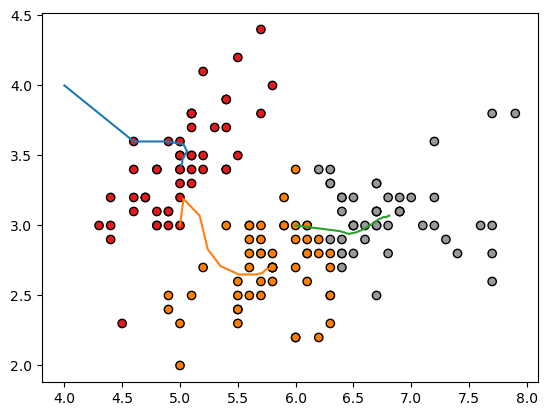

In [19]:
for i in range(len(unique_y)):
    plt.plot([c[0] for c in c_list[i]], [c[1] for c in c_list[i]])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")

In [20]:
#model.labels_

In [21]:
clusters = [df[df['y_pred'] == i].reindex(columns = ['x0','x1']).to_numpy() for i in unique_y]

#clusters

In [22]:
inertie = 0
for i in range(len(unique_y)):
    inertie = inertie + round(sum([dist_calc(P, new_centroids[i]) for P in clusters[i]]), 2)

round(inertie, 2)

62.66

In [23]:
from k_means_class import kmeans
modele = kmeans()

In [24]:
modele.fit(X)

In [25]:
y_pred = modele.predict(X)
#y_pred

In [26]:
cd10 = modele.elbow(X, 10)
cd10

[125.45, 83.41, 65.28, 55.97, 51.85, 50.56, 48.12, 39.42, 45.89, 40.94]

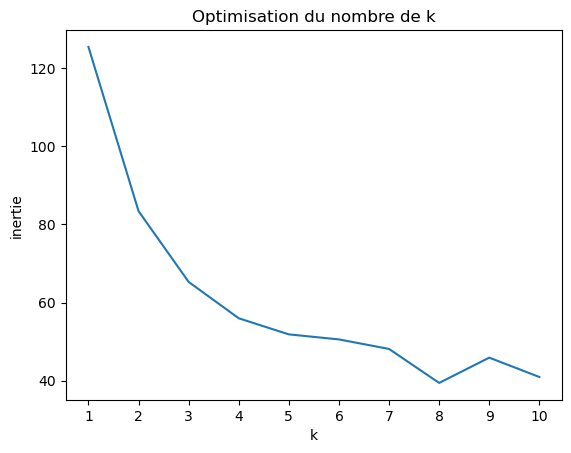

In [27]:
plt.plot(range(1, 11),cd10)
plt.xticks(range(1, 11))
plt.xlabel ('k')
plt.ylabel ('inertie')
plt.title ('Optimisation du nombre de k')
plt.show()